<a href="https://colab.research.google.com/github/pamela-cp/Cardiovascular-Disease/blob/main/notebooks/Cardiovascular_Disease_England.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardio Vascular Disease in England

This section uses data from various datasets from the UK Office for National Statistics. Each row of the data represents one local authority region. It contains data representing the percentage of people
living in the area who have recently experienced Cardiovascular Disease (CVD), the proportion who
are overweight, the proportion who meet the definition of living in poverty, the proportion who
smoke, the average wellbeing score of people living in the area, and the total population living in each area.

We are interested in identifying which of these factors (overweight, smokers, wellbeing, and poverty)
affect the prevalence of CVD in an area. You should perform and present appropriate analyses. You
should report these results using standard statistical reporting conventions, and summarise in plain
English what it is you find or conclude.
You should also present a professionally formatted figure that visualises the effect of Poverty upon
CVD.

### Data dictionary

Variable | Description
------------- | -------------
area_name| The name of the area in UK which represents a local authority region
area_code| The code of the area in UK which represents a local authority region
Population| The total population living in the area
Poverty| The proportion of people living in the area who meet the definition of living in poverty
CVD| The proportion of people living in the area who have recently experienced Cardiovascular Disease (CVD)
overweight| The proportion of people living in the area who are overweight
smokers| The proportion of people living in the area who smoke
wellbeing| The average wellbeing score of people living in the area


### 1. Loading Data

Loading in the data and checking it for integrity/quality.

In [ ]:
from google.colab import files

print("Please upload the 'Cardio_Vascular_Disease.csv' file.")
files.upload()

%pip install rpy2
%load_ext rpy2.ipython

Please upload the 'Cardio_Vascular_Disease.csv' file.


Saving Cardio_Vascular_Disease.csv to Cardio_Vascular_Disease (1).csv
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

install.packages('kableExtra')
install.packages('gridExtra')
install.packages("Rmisc")
install.packages("Hmisc")
install.packages("skimr")
install.packages("emmeans")
install.packages("grid")
install.packages("car")
install.packages("reshape2")

library(tidyverse)
library(ggplot2)

library(kableExtra)
library(gridExtra)
library(Rmisc) # multiplot
library(Hmisc)  # for correlation functions
library(skimr)
library(emmeans)
library(grid)
library(car)
library(reshape2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/kableExtra_1.4.0.tar.gz'
Content type 'application/x-gzip' length 1824636 bytes (1.7 MB)
downloaded 1.7 MB


The downloaded source packages are in
	‘/tmp/RtmpwjbIrc/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB


The downloaded source packages are in
	‘/tmp/RtmpwjbIrc/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/Rmisc_1.5.1.tar.gz'
Content type 'application/x-gzip' length 10175 bytes
downloaded 10175 bytes


The downloaded source packages are in
	‘/tmp/RtmpwjbIrc/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘li

In [ ]:
%%R

# 1.1: Load in the data
q1_data <- read_csv("Cardio_Vascular_Disease.csv",show_col_types = FALSE)

### 2. Data Understanding and EDA

#### 2.1. Data Understanding

The dataset includes the population of each local authority region (Population) where the prevalence of CVD could differ significantly for small and large populations considering some other factors such as access to healthcare and sanitary culture. Therefore, Population will be included in the analysis as one more variable to explore.

#### 2.2. Validations for integrity/quality through EDA

##### 2.2.1. Checking data structure, missing values and duplicates

In [ ]:
%%R
# 2.2.1.1: Checking structure and data types of each column of the table
str(q1_data)

# 2.2.1.2: Checking statistics of each column
summary(q1_data)

# 2.2.1.3: Checking for missing values (NA values) in each column
colSums(is.na(q1_data))

# 2.2.1.4: Checking for %missing values (NA values) in each column
round(colSums(is.na(q1_data))/nrow(q1_data)*100,2)

# 2.2.1.5: Checking for duplicate records in each column
lapply(q1_data, function(column) sum(duplicated(column)))

spc_tbl_ [385 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ area_name : chr [1:385] "Hartlepool" "Middlesbrough" "Redcar and Cleveland" "Stockton-on-Tees" ...
 $ area_code : chr [1:385] "E06000001" "E06000002" "E06000003" "E06000004" ...
 $ Population: num [1:385] 88905 133375 131035 186365 104300 ...
 $ Poverty   : num [1:385] 23 25.1 21.4 19.5 19.7 21.9 17.9 24.9 26.1 22.4 ...
 $ CVD       : num [1:385] 13.7 13.1 15 12.4 11.9 15.7 12 13.4 17.6 11.2 ...
 $ overweight: num [1:385] 34.6 32 33.4 40.2 35.7 ...
 $ smokers   : num [1:385] 17.3 17.9 13.3 12.5 10.6 13.2 10 15.5 20.6 22 ...
 $ wellbeing : num [1:385] 7.33 7.21 7.44 7.4 7.25 7.29 7.21 7.43 7.16 7.14 ...
 - attr(*, "spec")=
  .. cols(
  ..   area_name = col_character(),
  ..   area_code = col_character(),
  ..   Population = col_double(),
  ..   Poverty = col_double(),
  ..   CVD = col_double(),
  ..   overweight = col_double(),
  ..   smokers = col_double(),
  ..   wellbeing = col_double()
  .. )
 - attr(*, "problems")=<exter

  - There are categorical variables (area_name and area_code) and numerical variables (Population, Poverty, CVD, overweight, smokers, wellbeing and CVD), comprising a total of 385 rows.
  - Missing values are present in all the numerical variables, with some variables missing approximately 20% of their data. These records should be removed during the cleaning stage.
  - Duplicates exist among the numerical variables, but these are natural coincidences in the data and do not require removal during cleaning.

  ##### 2.2.2. Checking outliers before data cleaning

**2.2.2.1. Checking for Outliers Using Histograms in CVD, Population, Poverty, Overweight, Smokers, and Wellbeing**

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


In addition: There were 12 warnings (use warnings() to see them)


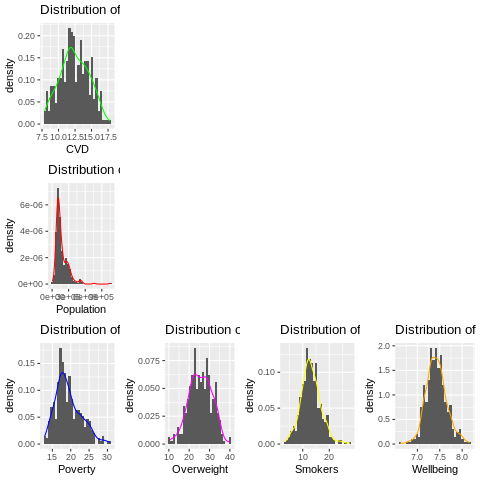

In [ ]:
%%R
# Plotting graph
grid.arrange(
  ggplot(q1_data) + geom_histogram(aes(CVD,after_stat(density))) + geom_density(aes(CVD), color = "green")  + labs(title = "Distribution of CVD", x = "CVD"),

  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(Population,after_stat(density))) +  geom_density(aes(Population), color = "red") + labs(title = "Distribution of Population", x = "Population"),

  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(Poverty,after_stat(density))) + geom_density(aes(Poverty), color = "blue") + labs(title = "Distribution of Poverty", x = "Poverty"),
  ggplot(q1_data) + geom_histogram(aes(overweight,after_stat(density))) + geom_density(aes(overweight), color = "magenta") + labs(title = "Distribution of Overweight", x = "Overweight"),
  ggplot(q1_data) + geom_histogram(aes(smokers,after_stat(density))) + geom_density(aes(smokers), color = "yellow") + labs(title = "Distribution of Smokers", x = "Smokers"),
  ggplot(q1_data) + geom_histogram(aes(wellbeing,after_stat(density))) + geom_density(aes(wellbeing), color = "orange") + labs(title = "Distribution of Wellbeing", x = "Wellbeing"),
  ncol=4, nrow=3
)

- **_CVD_**. The distribution is approximately normal. The CVD prevalence data shows a relatively symmetric distribution, indicating that most regions have a middle-range prevalence of cardiovascular disease. The normal distribution makes it suitable for linear regression without further transformation.
- **_Population_**. The distribution of Population is highly skewed to the right. This could be typical of population distributions due to few areas with very high populations and most areas with smaller populations.  Applying a log transformation can help normalize this skewed distribution for analysis.
- **_Poverty_**. The distribution is slightly skewed to the right. While most of the areas have a low to moderate ratio of poverty, there is a group with high poverty levels.
- **_Overweight_**. The distribution is approximately normal. Most of the areas have a middle-range percentage of overweight individuals, with fewer regions at the extremes (very low or very high percentages).
- **_Smokers_**. The distribution is slightly skewed to the right. There is a higher concentration of regions with moderate smoking rates.
- **_Wellbeing_**. The distribution is approximately normal. Most of the areas have a middle-range score for wellbeing.


**2.2.2.2. Checking for outliers using Boxplots in CVD, Population, Poverty, Overweight, Smokers, and Wellbeing**

# A tibble: 7 × 8
  area_name      area_code Population Poverty   CVD overweight smokers wellbeing
  <chr>          <chr>          <dbl>   <dbl> <dbl>      <dbl>   <dbl>     <dbl>
1 Cornwall       E06000052     549610    20    13.8       25.0    11.5      7.57
2 Buckinghamshi… E06000060     536030    17.7  11.9       21.4    10.5      7.39
3 Manchester     E08000003     504475    29.1  12.2       26.2    16.8      7.12
4 Sheffield      E08000019     518885    19.1  12.9       25.4    13.3      7.13
5 Birmingham     E08000025    1056970    24.5  11.4       26.9    16.1      7.2 
6 Bradford       E08000032     513785    20.8  10.4       27.6    15.4      7.29
7 Leeds          E08000035     760265    17.9  11.2       23.8    12.1      7.28


In addition: Warning messages:
1: Removed 76 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
2: Removed 76 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
3: Removed 76 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
4: Removed 72 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
5: Removed 7 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
6: Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`). 


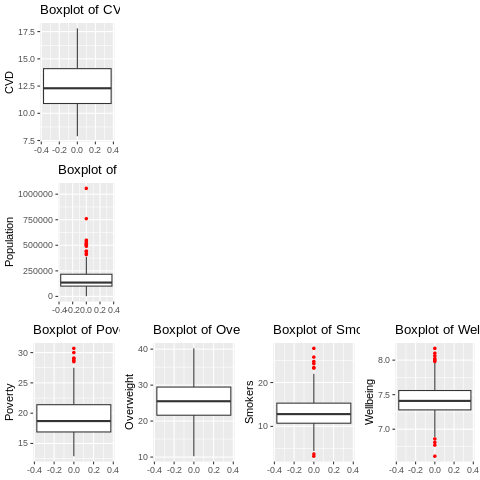

In [ ]:
%%R

# Plotting graph
grid.arrange(
  ggplot(q1_data) + geom_boxplot(aes(y = CVD), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of CVD", y = "CVD"
  ),

  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),

  ggplot(q1_data) + geom_boxplot(aes(y = Population), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Population", y = "Population"
  ),

  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),
  ggplot(q1_data) + theme(panel.background = element_blank()),

  ggplot(q1_data) + geom_boxplot(aes(y = Poverty), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Poverty", y = "Poverty"
  ),
  ggplot(q1_data) + geom_boxplot(aes(y = overweight), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Overweight", y = "Overweight"
  ),
  ggplot(q1_data) + geom_boxplot(aes(y = smokers), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Smokers", y = "Smokers"
  ),
  ggplot(q1_data) + geom_boxplot(aes(y = wellbeing), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Wellbeing", y = "Wellbeing"
  ),

  ncol=4,
  nrow=3
)

# Checking outliers with Population over 500,000
q1_data %>% filter(Population >= 500000)

- **_CVD_**. The absence of outliers and the relatively tight IQR suggest that CVD prevalence is fairly consistent among the regions.
- **_Population_**.
  - There are 2 very high outliers in the distribution of population which correspond to Birmingham and Leeds.
  - As a fact, Birmingham is the most populous local authority area in England with around 1.1 million residents as of 2024. On the other hand, in 2021 the population of Leeds was approximately 812,000 people. Therefore, the data seems to be consistent with no need for removing values.
- **_Poverty_**. Some outliers are present above 30%, suggesting these regions experience significantly higher poverty rates compared to others.
- **_Overweight_**. The distribution appears fairly uniform, with the median centrally located within the IQR, indicating that most regions have similar levels of overweight prevalence.
- **_Smokers_**. Several outliers are present above 20%, indicating that some regions have significantly higher smoking rates.
- **_Wellbeing_**. Several outliers are present above 8 and under 7, indicating a tight range for wellbeing  and some regions with significantly higher and lower values.

**2.2.2.3. Calculating percentage of data to clean**

In [ ]:
%%R
# Percentage of data to clean
round(sum(!complete.cases(q1_data))/nrow(q1_data)*100,2)

[1] 21.3



- 21.3% of the total data should be cleaned due to missing values

##### 2.2.3. Data Cleaning and final review

**2.2.3.1. Cleaning records with missing values**

In [ ]:
%%R

# Dropping missing values
q1_data2<- q1_data %>% drop_na()

**2.2.3.2. Checking Histograms for CVD, Population, Poverty, Overweight, Smokers, and Wellbeing after cleaning data**

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


In addition: There were 12 warnings (use warnings() to see them)


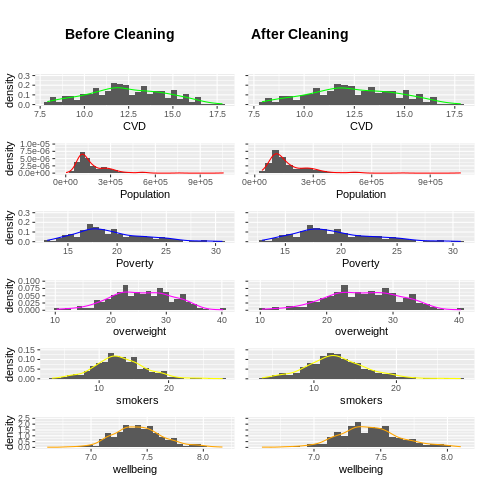

In [ ]:
%%R

# Creating column titles as text grobs
before_title <- textGrob("Before Cleaning", gp = gpar(fontsize = 14, fontface = "bold"), hjust = 0.5)
after_title <- textGrob("After Cleaning", gp = gpar(fontsize = 14, fontface = "bold"), hjust = 0.5)

# Combining titles and plots
grid.arrange(

  arrangeGrob(before_title, ncol = 1), # Add column titles
  arrangeGrob(after_title, ncol = 2), # Add column titles

  ggplot(q1_data) + geom_histogram(aes(CVD,after_stat(density))) + geom_density(aes(CVD), color = "green") + scale_y_continuous(limits = c(0, 0.3)),
  ggplot(q1_data2) + geom_histogram(aes(CVD,after_stat(density))) + geom_density(aes(CVD), color = "green") + scale_y_continuous(limits = c(0, 0.3)) + theme(axis.text.y=element_blank(),axis.title.y = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(Population,after_stat(density))) +  geom_density(aes(Population), color = "red") + scale_y_continuous(limits = c(0, 0.00001)),
  ggplot(q1_data2) + geom_histogram(aes(Population,after_stat(density))) +  geom_density(aes(Population), color = "red") + scale_y_continuous(limits = c(0, 0.00001)) + theme(axis.text.y=element_blank(),axis.title.y = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(Poverty,after_stat(density))) + geom_density(aes(Poverty), color = "blue") + scale_y_continuous(limits = c(0, 0.3)),
  ggplot(q1_data2) + geom_histogram(aes(Poverty,after_stat(density))) + geom_density(aes(Poverty), color = "blue") + scale_y_continuous(limits = c(0, 0.3)) + theme(axis.text.y=element_blank(),axis.title.y = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(overweight,after_stat(density))) + geom_density(aes(overweight), color = "magenta")  + scale_y_continuous(limits = c(0, 0.1)) ,
  ggplot(q1_data2) + geom_histogram(aes(overweight,after_stat(density))) + geom_density(aes(overweight), color = "magenta") + scale_y_continuous(limits = c(0, 0.1)) + theme(axis.text.y=element_blank(),axis.title.y = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(smokers,after_stat(density))) + geom_density(aes(smokers), color = "yellow") + scale_y_continuous(limits = c(0, 0.15)),
  ggplot(q1_data2) + geom_histogram(aes(smokers,after_stat(density))) + geom_density(aes(smokers), color = "yellow") + scale_y_continuous(limits = c(0, 0.15)) + theme(axis.text.y=element_blank(),axis.title.y = element_blank()),

  ggplot(q1_data) + geom_histogram(aes(wellbeing,after_stat(density))) + geom_density(aes(wellbeing), color = "orange") + scale_y_continuous(limits = c(0, 2.5)),
  ggplot(q1_data2) + geom_histogram(aes(wellbeing,after_stat(density))) + geom_density(aes(wellbeing), color = "orange") + scale_y_continuous(limits = c(0, 2.5)) + theme(axis.text.y=element_blank(),axis.title.y = element_blank()),

  ncol = 2, nrow = 7,
  layout_matrix = rbind(
    c(1, 2), # Row for titles
    c(3, 4), c(5, 6), c(7, 8), c(9, 10), c(11, 12), c(13, 14) # Rows for plots
  )
)


- The graphs show minimal changes in their distributions.

**2.2.3.3. Checking Boxplots for CVD, Population, Poverty, Overweight, Smokers, and Wellbeing after cleaning data**

In addition: Warning messages:
1: Removed 76 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
2: Removed 76 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
3: Removed 76 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
4: Removed 72 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
5: Removed 7 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
6: Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`). 


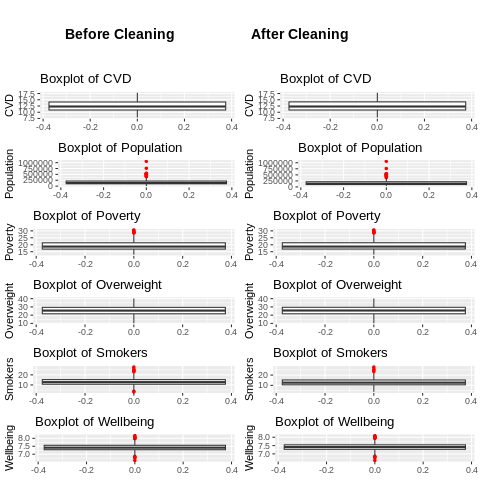

In [ ]:
%%R

# Plotting graph
grid.arrange(

  arrangeGrob(before_title, ncol = 1), # Add column titles
  arrangeGrob(after_title, ncol = 2), # Add column titles

  ggplot(q1_data) + geom_boxplot(aes(y = CVD), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of CVD", y = "CVD"
  ),
  ggplot(q1_data2) + geom_boxplot(aes(y = CVD), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of CVD", y = "CVD"
  ),

    ggplot(q1_data) + geom_boxplot(aes(y = Population), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Population", y = "Population"
  ),
  ggplot(q1_data2) + geom_boxplot(aes(y = Population), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Population", y = "Population"
  ),

  ggplot(q1_data) + geom_boxplot(aes(y = Poverty), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Poverty", y = "Poverty"
  ),
  ggplot(q1_data2) + geom_boxplot(aes(y = Poverty), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Poverty", y = "Poverty"
  ),

  ggplot(q1_data) + geom_boxplot(aes(y = overweight), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Overweight", y = "Overweight"
  ),
  ggplot(q1_data2) + geom_boxplot(aes(y = overweight), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Overweight", y = "Overweight"
  ),

  ggplot(q1_data) + geom_boxplot(aes(y = smokers), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Smokers", y = "Smokers"
  ),
  ggplot(q1_data2) + geom_boxplot(aes(y = smokers), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Smokers", y = "Smokers"
  ),

  ggplot(q1_data) + geom_boxplot(aes(y = wellbeing), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Wellbeing", y = "Wellbeing"
  ),
  ggplot(q1_data2) + geom_boxplot(aes(y = wellbeing), outlier.color = "red", outlier.size =1 ) + labs(
    title = "Boxplot of Wellbeing", y = "Wellbeing"
  ),

  ncol=2,
  nrow=7
)


- There aren't significant changes in the distribution of CVD, Population, Poverty, Overweight, Smokers, and Wellbeing after cleaning the data.

### 3. Evaluating each variable individually

#### 3.1. Checking the correlation matrix

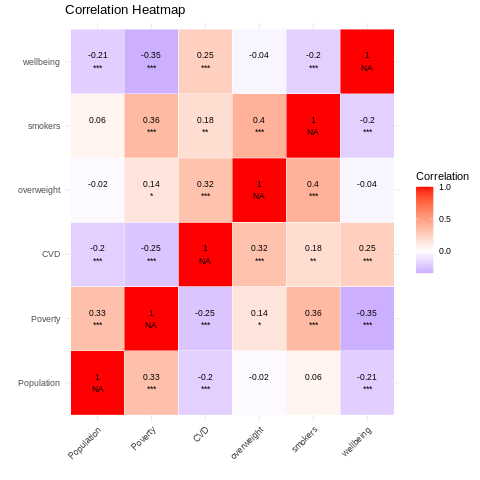

In [ ]:
%%R

# Calculating correlation
q1_corr<-rcorr(as.matrix(q1_data2[, 3:ncol(q1_data2)]))
q1_corr

# Extract the correlation matrix and p-value matrix
cor_matrix <- q1_corr$r
p_matrix <- q1_corr$P

# Melt the matrices into long format for ggplot2
cor_long <- melt(cor_matrix)
colnames(cor_long) <- c("Var1", "Var2", "Correlation")
p_long <- melt(p_matrix)
colnames(p_long) <- c("Var1", "Var2", "p_value")

# Merge correlation and p-value data
heatmap_data <- merge(cor_long, p_long, by = c("Var1", "Var2"))

# Add significance stars
heatmap_data$Significance <- cut(
  heatmap_data$p_value,
  breaks = c(-Inf, 0.001, 0.01, 0.05, Inf),
  labels = c("***", "**", "*", ""),
  right = FALSE
)

# Create the heatmap
ggplot(heatmap_data, aes(Var1, Var2, fill = Correlation)) +
  geom_tile(color = "white") +
  geom_text(aes(label = paste0(round(Correlation, 2), "\n", Significance)),
            color = "black", size = 3) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0,
                       name = "Correlation") +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


- _Significant correlations:_
  - **CVD vs. Population:** Negative correlation (-0.20), p-value < 0.05, suggests that as population increases, the incidence of CVD tends to decrease.
  - **CVD vs. Poverty:** Negative correlation (-0.25), p-value < 0.05, suggests that as poverty increases, the incidence of CVD tends to decrease.
  - **CVD vs. overweight:** Positive correlation (0.32), p-value < 0.05, suggests that as overweight increases, the incidence of CVD also tends to increase.
  - **CVD vs. smokers:** Positive correlation (0.18), p-value < 0.05, suggests that as smokers increase, the incidence of CVD also tends to increase.
  - **CVD vs. wellbeing:** Positive correlation (0.25), p-value < 0.05, suggests that as wellbeing increases, the incidence of CVD also tends to increase.

<br>

- _Other Significant correlations:_
  - **Poverty vs Population:** Positive correlation (0.33), p-value < 0.05, suggests that as population increases, the incidence of CVD tends to increase.
  - **Smokers vs Overweight:** Positive correlation (0.40), p-value < 0.05, suggests that as smokers  increase, the incidence of overweight also tends to increase.
  - **Smokers vs Poverty:** Positive correlation (0.36), p-value < 0.05, suggests that as smokers  increase, the incidence of poverty also tends to increase.
  - **Poverty vs Wellbeing:** Negative correlation (-0.35), p-value < 0.05, suggests that as poverty increases, wellbeing tends to decrease.
  - **Smokers vs Wellbeing:** Negative correlation (-0.20), p-value < 0.05, suggests that as smokers increase, wellbeing tends to decrease.
  - **Population vs Wellbeing:** Negative correlation (-0.21), p-value < 0.05, suggests that as population increases, wellbeing tends to decrease.

#### 3.2. Analysis of the effect of each variable in CVD

##### 3.2.1. Visualisations of the relationship between each variable and CVD


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


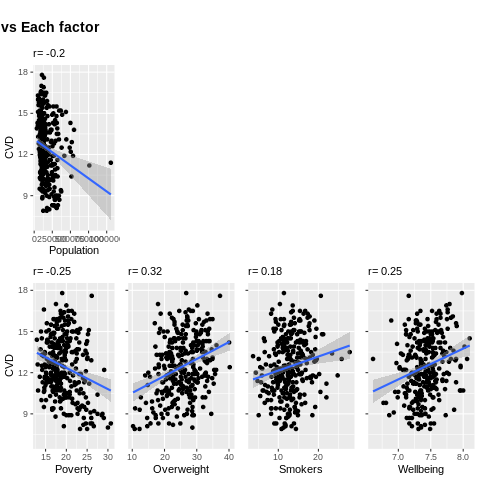

In [ ]:
%%R

grid.arrange(

  arrangeGrob(textGrob("CVD vs Each factor", gp = gpar(fontsize = 14, fontface = "bold"), hjust = 0.7, vjust = 1)),

  ggplot(q1_data2) + theme(panel.background = element_blank()),
  ggplot(q1_data2) + theme(panel.background = element_blank()),
  ggplot(q1_data2) + theme(panel.background = element_blank()),

  # CVD per Population
  ggplot(q1_data2, aes(y=CVD, x=Population)) + geom_point() + labs(x="Population", y="CVD", subtitle=paste("r=",round(q1_corr$r["CVD","Population"],2))) + geom_smooth(method=lm) + scale_y_continuous(limits = c(7, 18)),

  ggplot(q1_data2) + theme(panel.background = element_blank()),
  ggplot(q1_data2) + theme(panel.background = element_blank()),
  ggplot(q1_data2) + theme(panel.background = element_blank()),

  # CVD per Poverty
  ggplot(q1_data2, aes(y=CVD, x=Poverty)) + geom_point() + labs(x="Poverty", y="CVD", subtitle=paste("r=",round(q1_corr$r["CVD","Poverty"],2))) + geom_smooth(method=lm) + scale_y_continuous(limits = c(7, 18)),

  # CVD per overweight
  ggplot(q1_data2, aes(y=CVD, x=overweight)) + geom_point() + labs(x="Overweight", y=NULL, subtitle=paste("r=",round(q1_corr$r["CVD","overweight"],2))) + geom_smooth(method=lm) + scale_y_continuous(limits = c(7, 18)) + theme(axis.text.y=element_blank()),

  # CVD per smokers
  ggplot(q1_data2, aes(y=CVD, x=smokers)) + geom_point() + labs(x="Smokers", y=NULL, subtitle=paste("r=",round(q1_corr$r["CVD","smokers"],2))) + geom_smooth(method=lm) + scale_y_continuous(limits = c(7, 18))+theme(axis.text.y=element_blank()),

  # CVD per wellbeing
  ggplot(q1_data2, aes(y=CVD, x=wellbeing)) + geom_point() + labs(x="Wellbeing", y=NULL, subtitle=paste("r=",round(q1_corr$r["CVD","wellbeing"],2))) + geom_smooth(method=lm) + scale_y_continuous(limits = c(7, 18))+theme(axis.text.y=element_blank()),

  ncol=4,
  nrow=3,
  heights = c(0.2, 1, 1)
)


##### 3.2.2. Building linear models to analyse the effect of each variable in CVD

**3.2.2.1. CVD per Population**

In [ ]:
%%R

# Building the linear model
m.CVD.by.Population <- lm(CVD~Population, data=q1_data2)

# Summary of the linear model
summary(m.CVD.by.Population)

# Calculating the Confidence Intervals
cbind(coefficient=coef(m.CVD.by.Population), confint(m.CVD.by.Population))

              coefficient         2.5 %        97.5 %
(Intercept)  1.311463e+01  1.267464e+01  1.355462e+01
Population  -3.808691e-06 -5.908988e-06 -1.708394e-06


- There is a significant negative effect of population upon CVD ($t(301)=-3.57$, $p<.001$), with every 1 individual increase in population predicting an average decrease of 0.000004 units on the test (CI = [0.000002, 0.000006]).

- The model explains only 4.06% of the variability in CVD, suggesting there are other important factors not included in the model.

In [ ]:
%%R

# Performing anova
anova(m.CVD.by.Population)

Analysis of Variance Table

Response: CVD
            Df  Sum Sq Mean Sq F value    Pr(>F)    
Population   1   57.78  57.783  12.735 0.0004176 ***
Residuals  301 1365.79   4.538                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- CVD differs significantly across population , $F(1,301)=12.735$, $p = .0004$

**3.2.2.2. CVD per Poverty**

In [ ]:
%%R

# Building the linear model
m.CVD.by.Poverty <- lm(CVD~Poverty, data=q1_data2)

# Summary of the linear model
summary(m.CVD.by.Poverty)

# Calculating the Confidence Intervals
cbind(coefficient=coef(m.CVD.by.Poverty), confint(m.CVD.by.Poverty))

# Performing anova
anova(m.CVD.by.Poverty)

Analysis of Variance Table

Response: CVD
           Df  Sum Sq Mean Sq F value    Pr(>F)    
Poverty     1   87.61  87.615   19.74 1.248e-05 ***
Residuals 301 1335.96   4.438                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- There is a significant negative effect of poverty upon CVD ($t(301)=-4.44$, $p<.001$), with every 1 unit increase in ratio of poverty predicting an average decrease of 0.15 units on the test ($CI = [0.09, 0.22]$.

- The model explains only 6.16% of the variability in CVD, suggesting there are other important factors not included in the model.

- CVD differs significantly across poverty, $F(1,301)=19.74$, $p = .00001$

**3.2.2.3. CVD per Overweight**

In [ ]:
%%R

# Building the linear model
m.CVD.by.Overweight <- lm(CVD~overweight, data=q1_data2)

In [ ]:
%%R

# Summary of the linear model
summary(m.CVD.by.Overweight)


Call:
lm(formula = CVD ~ overweight, data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8292 -1.5188 -0.1375  1.5367  5.4854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.29527    0.55253   16.82  < 2e-16 ***
overweight   0.12338    0.02113    5.84 1.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.061 on 301 degrees of freedom
Multiple R-squared:  0.1018,	Adjusted R-squared:  0.09878 
F-statistic:  34.1 on 1 and 301 DF,  p-value: 1.355e-08



In [ ]:
%%R

# Calculating the Confidence Intervals
print(cbind(coefficient=coef(m.CVD.by.Overweight), confint(m.CVD.by.Overweight)))

            coefficient      2.5 %     97.5 %
(Intercept)   9.2952675 8.20795844 10.3825766
overweight    0.1233773 0.08180075  0.1649539


In [ ]:
%%R

# Performing anova
print(anova(m.CVD.by.Overweight))

Analysis of Variance Table

Response: CVD
            Df  Sum Sq Mean Sq F value    Pr(>F)    
overweight   1  144.87 144.868  34.101 1.355e-08 ***
Residuals  301 1278.71   4.248                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- There is a significant positive effect of overweight upon CVD ($t(301)=5.84$, $p<.001$), with every 1 unit increase in the ratio of overweight predicting an average increase of 0.12 units on the test ($CI = [0.08, 0.16]$).

- The model explains 10.18% of the variability in CVD.

- CVD differs significantly across overweight, $F(1,301)=34.1$, $p = .00000001$

**3.2.2.4. CVD per Smokers**

In [ ]:
%%R

# Building the linear model
m.CVD.by.Smokers <- lm(CVD~smokers, data=q1_data2)

# Summary of the linear model
summary(m.CVD.by.Smokers)


Call:
lm(formula = CVD ~ smokers, data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7038 -1.3878 -0.1537  1.6257  5.5031 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.13068    0.43746  25.444  < 2e-16 ***
smokers      0.10230    0.03263   3.135  0.00189 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.14 on 301 degrees of freedom
Multiple R-squared:  0.03162,	Adjusted R-squared:  0.0284 
F-statistic: 9.828 on 1 and 301 DF,  p-value: 0.001888



In [ ]:
%%R
# Calculating the Confidence Intervals
cbind(coefficient=coef(m.CVD.by.Smokers), confint(m.CVD.by.Smokers))

            coefficient       2.5 %     97.5 %
(Intercept)   11.130680 10.26980818 11.9915521
smokers        0.102302  0.03808654  0.1665175


In [ ]:
%%R
# Performing anova
anova(m.CVD.by.Smokers)

Analysis of Variance Table

Response: CVD
           Df  Sum Sq Mean Sq F value   Pr(>F)   
smokers     1   45.01  45.014  9.8284 0.001888 **
Residuals 301 1378.56   4.580                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- There is a significant positive effect of smokers upon CVD ($t(301)=3.14$, $p<.001$), with every 1 unit increase in the proportion of smokers predicting an average increase of 0.10 units on the test ($CI = [0.04, 0.17]$).

- The model explains only 3.16% of the variability in CVD.

- CVD differs significantly across smokers, $F(1,301)=9.83$, $p = .002$

**3.2.2.5. CVD per Wellbeing**

In [ ]:
%%R

# Building the linear model
m.CVD.by.Wellbeing <- lm(CVD~wellbeing, data=q1_data2)

In [ ]:
%%R

# Summary of the linear model
summary(m.CVD.by.Wellbeing)


Call:
lm(formula = CVD ~ wellbeing, data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7102 -1.4962 -0.1551  1.6471  5.7299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.1872     3.7900  -1.105     0.27    
wellbeing     2.2426     0.5107   4.391 1.56e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.108 on 301 degrees of freedom
Multiple R-squared:  0.0602,	Adjusted R-squared:  0.05708 
F-statistic: 19.28 on 1 and 301 DF,  p-value: 1.563e-05



In [ ]:
%%R

# Calculating the Confidence Intervals
cbind(coefficient=coef(m.CVD.by.Wellbeing), confint(m.CVD.by.Wellbeing))

            coefficient      2.5 %   97.5 %
(Intercept)   -4.187166 -11.645409 3.271078
wellbeing      2.242641   1.237616 3.247666


In [ ]:
%%R

# Performing anova
anova(m.CVD.by.Wellbeing)

Analysis of Variance Table

Response: CVD
           Df  Sum Sq Mean Sq F value    Pr(>F)    
wellbeing   1   85.71  85.705  19.282 1.563e-05 ***
Residuals 301 1337.87   4.445                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- There is a significant positive effect of wellbeing upon CVD ($t(301)=4.39$, $p<.001$), with every 1 unit increase in the average score of wellbeing predicting an average increase of 2.24 units on the test ($CI = [1.24, 3.25]$).

- The model explains only 6.02% of the variability in CVD.

- CVD differs significantly across wellbeing, $F(1,301)=19.28$, $p = .00002$

### 4. Evaluating variables together

In the previous steps it was noticed that Population has a significant effect on CVD which means that could potentially contribute to assess the association between all the variables with CVD. Therefore, the following steps will consider the scenarios with and without Population to find the best model as the base to evaluate the performance of the predictors (Poverty, Overweight, Smokers and Wellbeing).

#### 4.1. Evaluating variables together with interactions among them (considering Population)

In [ ]:
%%R

# Building the model with interactions
m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.interactions <- lm(CVD~Population*Poverty*overweight*smokers*wellbeing, data=q1_data2)

In [ ]:
%%R
# Checking the model with interactions
summary(m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.interactions)


Call:
lm(formula = CVD ~ Population * Poverty * overweight * smokers * 
    wellbeing, data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3562 -1.2805 -0.1052  1.2960  4.4678 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                      9.255e+02  1.088e+03   0.851
Population                                      -9.734e-03  7.070e-03  -1.377
Poverty                                         -2.816e+01  5.935e+01  -0.475
overweight                                      -3.856e+01  4.394e+01  -0.878
smokers                                         -2.742e+01  7.992e+01  -0.343
wellbeing                                       -1.233e+02  1.482e+02  -0.832
Population:Poverty                               3.539e-04  3.662e-04   0.966
Population:overweight                            3.679e-04  2.847e-04   1.292
Poverty:overweight                               1.141e+00  2.378e+00   0.480
Popula

- None of the variables or the intercept are significant ($p>.001$) when being part of a model even though when evaluated independently they are. This suggests multicollinearity.

In [ ]:
%%R

# Checking for multicollinearity
vif(m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.interactions)

                                     Population 
                                       58427116 
                                        Poverty 
                                        3789545 
                                     overweight 
                                        5392037 
                                        smokers 
                                        8062911 
                                      wellbeing 
                                         109830 
                             Population:Poverty 
                                       86173714 
                          Population:overweight 
                                       69136603 
                             Poverty:overweight 
                                       11561780 
                             Population:smokers 
                                       76503499 
                                Poverty:smokers 
                                       16697745 
                    

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif


- There are extreme VIF values greater than 5 which suggests high interaction terms and high levels of multicollinearity.
- Simplifying the model by removing interactions could be helpful to reduce multicollinearity.

#### 4.2. Evaluating variables together without interactions among them (considering Population)

In [ ]:
%%R

# Building the model considering Population and removing interactions
m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.no.interactions <- lm(CVD~Population+Poverty+overweight+smokers+wellbeing, data=q1_data2)

In [ ]:
%%R

# Checking the model
summary(m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.no.interactions)


Call:
lm(formula = CVD ~ Population + Poverty + overweight + smokers + 
    wellbeing, data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3881 -1.4179 -0.1042  1.3865  4.5954 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.061e+00  3.949e+00  -0.269 0.788302    
Population  -1.493e-06  1.012e-06  -1.475 0.141145    
Poverty     -1.684e-01  3.664e-02  -4.596 6.39e-06 ***
overweight   1.084e-01  2.121e-02   5.109 5.79e-07 ***
smokers      1.175e-01  3.365e-02   3.493 0.000550 ***
wellbeing    1.719e+00  4.931e-01   3.486 0.000565 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.89 on 297 degrees of freedom
Multiple R-squared:  0.2548,	Adjusted R-squared:  0.2423 
F-statistic: 20.31 on 5 and 297 DF,  p-value: < 2.2e-16



- All predictors are highly significant (***) except for Population, meaning they are strongly associated with CVD in this model.
- About 25.48% of the variance in CVD is explained by this model.
- The overall model is statistically significant ($F(5,297) = 20.31, p<2.2e−16$), meaning at least one predictor has a non-zero effect on CVD.

In [ ]:
%%R

# Checking for multicollinearity
vif(m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.no.interactions)

Population    Poverty overweight    smokers  wellbeing 
  1.142574   1.377828   1.199156   1.363427   1.160023 


- The VIF values are less than 5 which suggests low interaction terms and controlled levels of multicollinearity.
- Let's see how different the model results when removing Population.

#### 4.3. Evaluating variables together with interactions among them (removing Population)

In [ ]:
%%R

# Building the model without Population and considering interactions
m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.interactions <- lm(CVD~Poverty*overweight*smokers*wellbeing, data=q1_data2)

In [ ]:
%%R

# Checking the model
summary(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.interactions)


Call:
lm(formula = CVD ~ Poverty * overweight * smokers * wellbeing, 
    data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2866 -1.3874 -0.1472  1.2321  5.0656 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)
(Intercept)                          -2.172e+02  3.308e+02  -0.657    0.512
Poverty                               1.292e+01  1.662e+01   0.778    0.437
overweight                            7.789e+00  1.435e+01   0.543    0.588
smokers                               2.098e+01  2.623e+01   0.800    0.425
wellbeing                             3.022e+01  4.522e+01   0.668    0.504
Poverty:overweight                   -4.614e-01  7.216e-01  -0.639    0.523
Poverty:smokers                      -1.231e+00  1.329e+00  -0.927    0.355
overweight:smokers                   -7.941e-01  1.089e+00  -0.729    0.467
Poverty:wellbeing                    -1.759e+00  2.284e+00  -0.770    0.442
overweight:wellbeing                 -1

- None of the variables or the intercept are significant ($p>0.001$) when being part of a model even though when evaluated independently they are. This suggests multicollinearity.


In [ ]:
%%R

# Checking for multicollinearity
vif(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.interactions)

                             Poverty                           overweight 
                           285912.98                            553276.84 
                             smokers                            wellbeing 
                           835768.79                              9837.72 
                  Poverty:overweight                      Poverty:smokers 
                          1024414.58                           1515653.50 
                  overweight:smokers                    Poverty:wellbeing 
                          2134986.16                            264850.24 
                overweight:wellbeing                    smokers:wellbeing 
                           565797.59                            827442.48 
          Poverty:overweight:smokers         Poverty:overweight:wellbeing 
                          3155032.79                           1012783.38 
           Poverty:smokers:wellbeing         overweight:smokers:wellbeing 
                         

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif


- There are extreme VIF values greater than 5 which suggests high interaction terms and high levels of multicollinearity.
- Simplifying the model by removing interactions could be helpful to reduce multicollinearity.

#### 4.4. Evaluating variables together without interactions among them (removing Population)


In [ ]:
%%R

# Building the model without Population and removing interactions
m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions <- lm(CVD~Poverty+overweight+smokers+wellbeing, data=q1_data2)

# Checking the model
summary(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions)


Call:
lm(formula = CVD ~ Poverty + overweight + smokers + wellbeing, 
    data = q1_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3966 -1.4313 -0.1097  1.3905  4.7779 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.69780    3.93361  -0.432 0.666335    
Poverty     -0.18400    0.03515  -5.234 3.13e-07 ***
overweight   0.10985    0.02123   5.174 4.22e-07 ***
smokers      0.12030    0.03366   3.574 0.000410 ***
wellbeing    1.80025    0.49096   3.667 0.000291 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.894 on 298 degrees of freedom
Multiple R-squared:  0.2494,	Adjusted R-squared:  0.2393 
F-statistic: 24.75 on 4 and 298 DF,  p-value: < 2.2e-16



- All predictors are highly significant (***), meaning they are strongly associated with CVD in this model.
- About 24.94% of the variance in CVD is explained by this model.
- The overall model is statistically significant ($F=24.75, p<2.2e−16)$), meaning at least one predictor has a non-zero effect on CVD.

In [ ]:
%%R

# Checking for multicollinearity
vif(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions)

   Poverty overweight    smokers  wellbeing 
  1.263094   1.196546   1.359206   1.145506 


- The VIF values are less than 5 which suggests low interaction terms and controlled levels of multicollinearity.

#### 4.5. Comparing the four models with and without interaccions, with and without Population


In [ ]:
%%R

# Without Population - Comparing between with and without interactions
anova(
  m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.interactions,
  m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions
)


Analysis of Variance Table

Model 1: CVD ~ Poverty * overweight * smokers * wellbeing
Model 2: CVD ~ Poverty + overweight + smokers + wellbeing
  Res.Df    RSS  Df Sum of Sq      F Pr(>F)
1    287 1016.4                            
2    298 1068.6 -11   -52.146 1.3385 0.2024


- The inclusion of interaction terms does not significantly improve the model ($p=0.05$). The simpler main-effects model is preferable, as it is easier to interpret and sufficiently explains the variability in CVD.


In [ ]:
%%R

# Without Interactions - Comparing between with and without Population
anova(
  m.CVD.by.Population.Poverty.Overweight.Smokers.Wellbeing.no.interactions,
  m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions

)

Analysis of Variance Table

Model 1: CVD ~ Population + Poverty + overweight + smokers + wellbeing
Model 2: CVD ~ Poverty + overweight + smokers + wellbeing
  Res.Df    RSS Df Sum of Sq     F Pr(>F)
1    297 1060.8                          
2    298 1068.6 -1   -7.7758 2.177 0.1411


- The inclusion of Population does not significantly improve the model ($p=0.14$). The simpler main-effects model is preferable, as it is easier to interpret and sufficiently explains the variability in CVD.
- The final model includes the variables Poverty, Overweight, Smokers and Wellbeing without interactions.

#### 4.6. Multiple Regression Model for CVD with Poverty, Overweight, Smokers and Wellbeing as factors

In [ ]:
%%R

# Building the model
summary(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions)

# Calculating the Confidence Intervals
cbind(coefficient=coef(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions),
      confint(m.CVD.by.Poverty.Overweight.Smokers.Wellbeing.no.interactions))


            coefficient       2.5 %     97.5 %
(Intercept)  -1.6977972 -9.43896508  6.0433707
Poverty      -0.1839990 -0.25317844 -0.1148195
overweight    0.1098530  0.06806757  0.1516385
smokers       0.1203042  0.05405715  0.1865512
wellbeing     1.8002479  0.83405073  2.7664450


- The intercept is not significant $(p=0.666)$. It represents the predicted CVD prevalence when all predictors are at zero, which may not be meaningful in this context.
- Poverty has a negative relationship with CVD. For each 1% increase in poverty, the prevalence of CVD decreases by 0.184%. This effect is statistically significant $(p<0.001)$.
- Overweight has a positive relationship with CVD. For each 1% increase in the proportion of overweight individuals, the prevalence of CVD increases by 0.1099%. This effect is statistically significant $(p<0.001)$.
- Smokers have a positive relationship with CVD. For each 1% increase in smokers, the prevalence of CVD increases by 0.1203%. This effect is statistically significant $(p<0.001)$.
- Wellbeing has a positive relationship with CVD. For each 1-unit increase in the wellbeing score, the prevalence of CVD increases by 1.8003%. This effect is statistically significant $(p<0.001)$.


### 5. Conclusions

- When analyzing which factors (overweight, smokers, wellbeing, and poverty) affect the prevalence of CVD in an area considering only their individual performance, all the variables result being significant to explain differences in the prediction.

- When analyzing which factors (overweight, smokers, wellbeing, and poverty) affect the prevalence of CVD in an area considering possible associations in a multiple regression that considers no interaction among the variables, all of the variables remain being significant to affect CVD.
